In [1]:
'''    Importing Libraries    '''

%pylab inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore');

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''  Loading Datasets  '''

#                                        '''     Download Links      '''
# Link = https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/test-file
# Link = https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/download/train-file


train=pd.read_csv("train_v9rqX0R.csv")
test=pd.read_csv("test_AbJTz2l.csv")

# EDA

In [3]:

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)



train.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4834,FDX14,13.100,Low Fat,0.074940,Dairy,75.0354,OUT046,1997,Small,Tier 1,Supermarket Type1,902.8248
7911,FDZ58,17.850,Low Fat,0.052258,Snack Foods,121.8072,OUT049,1999,Medium,Tier 1,Supermarket Type1,2450.1440
5758,FDU50,5.750,Regular,0.075323,Dairy,116.3176,OUT045,2002,NaN,Tier 2,Supermarket Type1,2519.3872
7544,FDI19,15.100,Low Fat,0.052296,Meat,242.9512,OUT013,1987,High,Tier 3,Supermarket Type1,4847.0240
7616,FDS39,6.895,Low Fat,0.022588,Meat,143.7812,OUT017,2007,NaN,Tier 2,Supermarket Type1,1994.7368


In [4]:
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2126,FDN32,17.50,Low Fat,0.015547,Fruits and Vegetables,183.3266,OUT013,1987,High,Tier 3,Supermarket Type1
4893,NCR54,16.35,Low Fat,0.090931,Household,195.7110,OUT018,2009,Medium,Tier 3,Supermarket Type2
5538,FDM03,12.65,Low Fat,0.123280,Meat,106.7938,OUT045,2002,NaN,Tier 2,Supermarket Type1
2997,NCG55,NaN,Low Fat,0.038957,Household,114.6176,OUT027,1985,Medium,Tier 3,Supermarket Type3
3951,FDY10,17.60,Low Fat,0.049059,Snack Foods,114.6176,OUT035,2004,Small,Tier 2,Supermarket Type1


In [5]:
'''   Shape of  both datasets '''
print('Training dataset :-',train.shape," /  Testing dataset :-",test.shape)

Training dataset :- (8523, 12)  /  Testing dataset :- (5681, 11)


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
'''    Concating Training and Testing datasets   '''

train['source']='train'
test['source']='test'
data = pd.concat([train, test])

print(data.shape)

(14204, 13)


In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

### Data Cleaning

In [12]:
'''  Filling Missing Values  '''

data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [13]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [14]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

### Visualising and Exploring the Training dataset

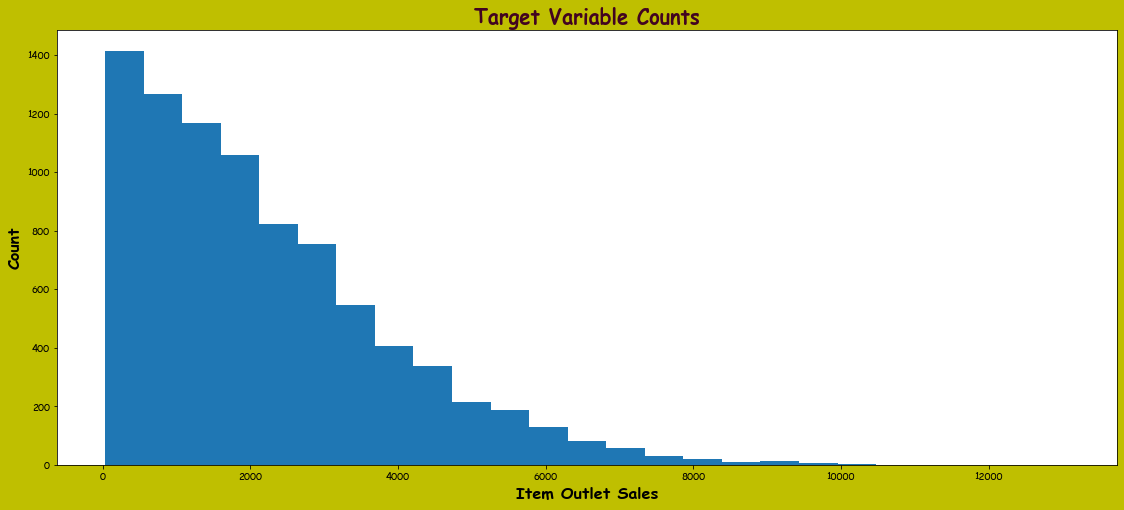

In [16]:
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(19,8),facecolor='y',edgecolor='b')
plt.hist(train['Item_Outlet_Sales'], bins = 25)
plt.title('Target Variable Counts',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item Outlet Sales',fontsize=16,fontweight='bold')
plt.ylabel('Count',fontsize=16,fontweight='bold')
plt.show()

In [17]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [18]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [19]:
''' Checking unique items value counts in Item_Identifier'''

print(train['Item_Identifier'].value_counts())

FDG33    10
FDW13    10
FDW26     9
FDD38     9
FDU12     9
         ..
FDT35     1
FDO33     1
FDE52     1
FDC23     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


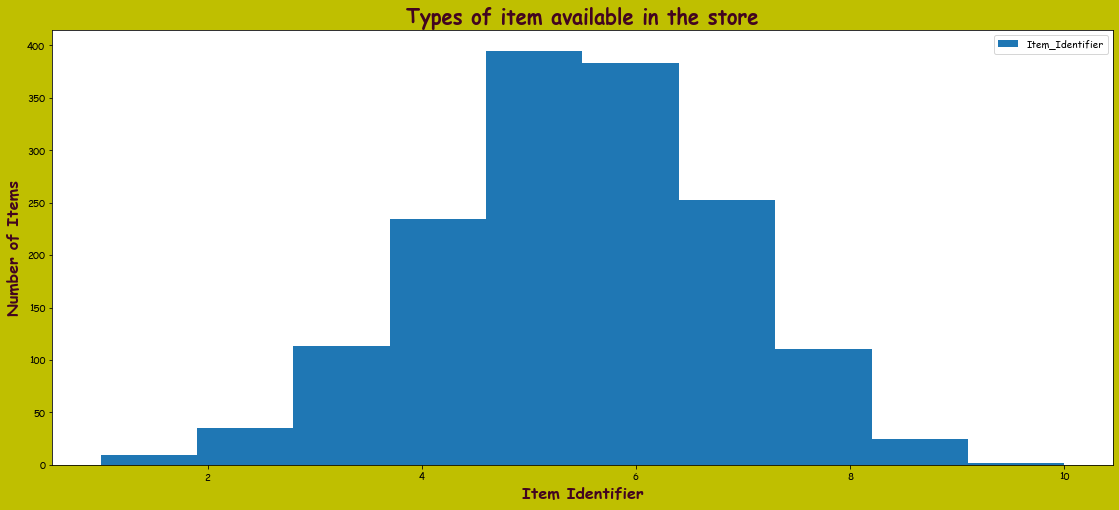

In [20]:
train['Item_Identifier'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(19,8),facecolor='y',edgecolor='b')
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Types of item available in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item Identifier',fontsize=16,fontweight='bold',color='#420420')
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.legend()
plt.show()

In [21]:
''' Checking unique items value counts in Item_Fat_Content'''

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

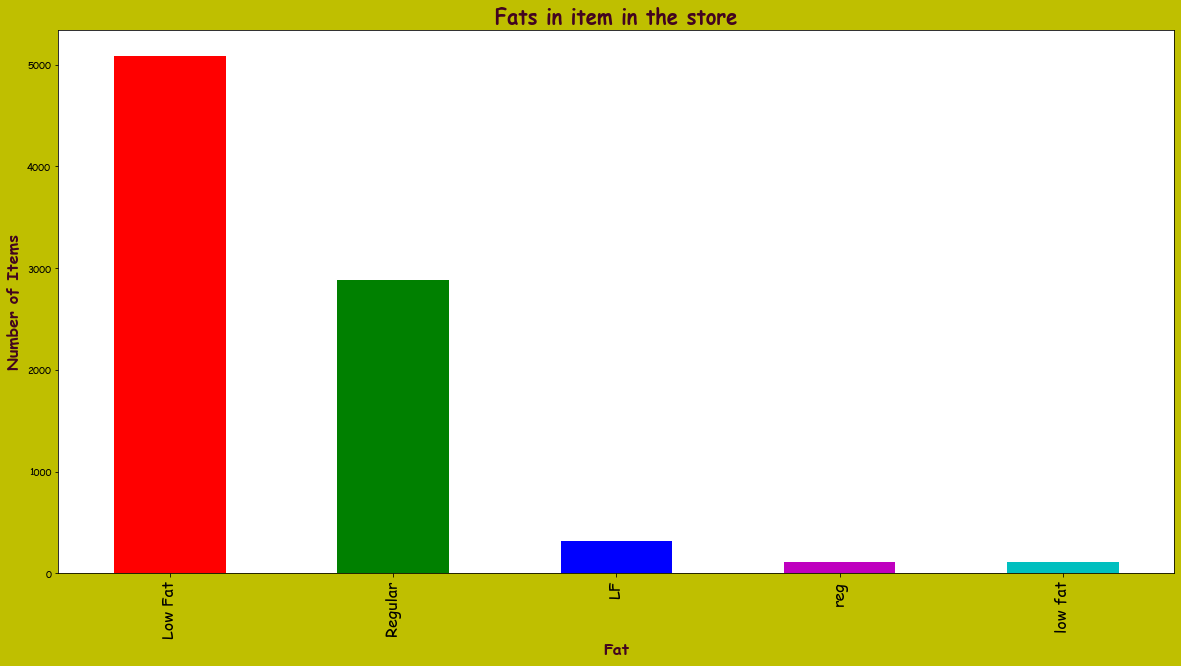

In [22]:
train['Item_Fat_Content'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,10),facecolor='y')
train['Item_Fat_Content'].value_counts().plot.bar(color = list('rgbmc'))
plt.title('Fats in item in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Fat',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

In [23]:
''' Checking unique items value counts in Item_Type'''

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

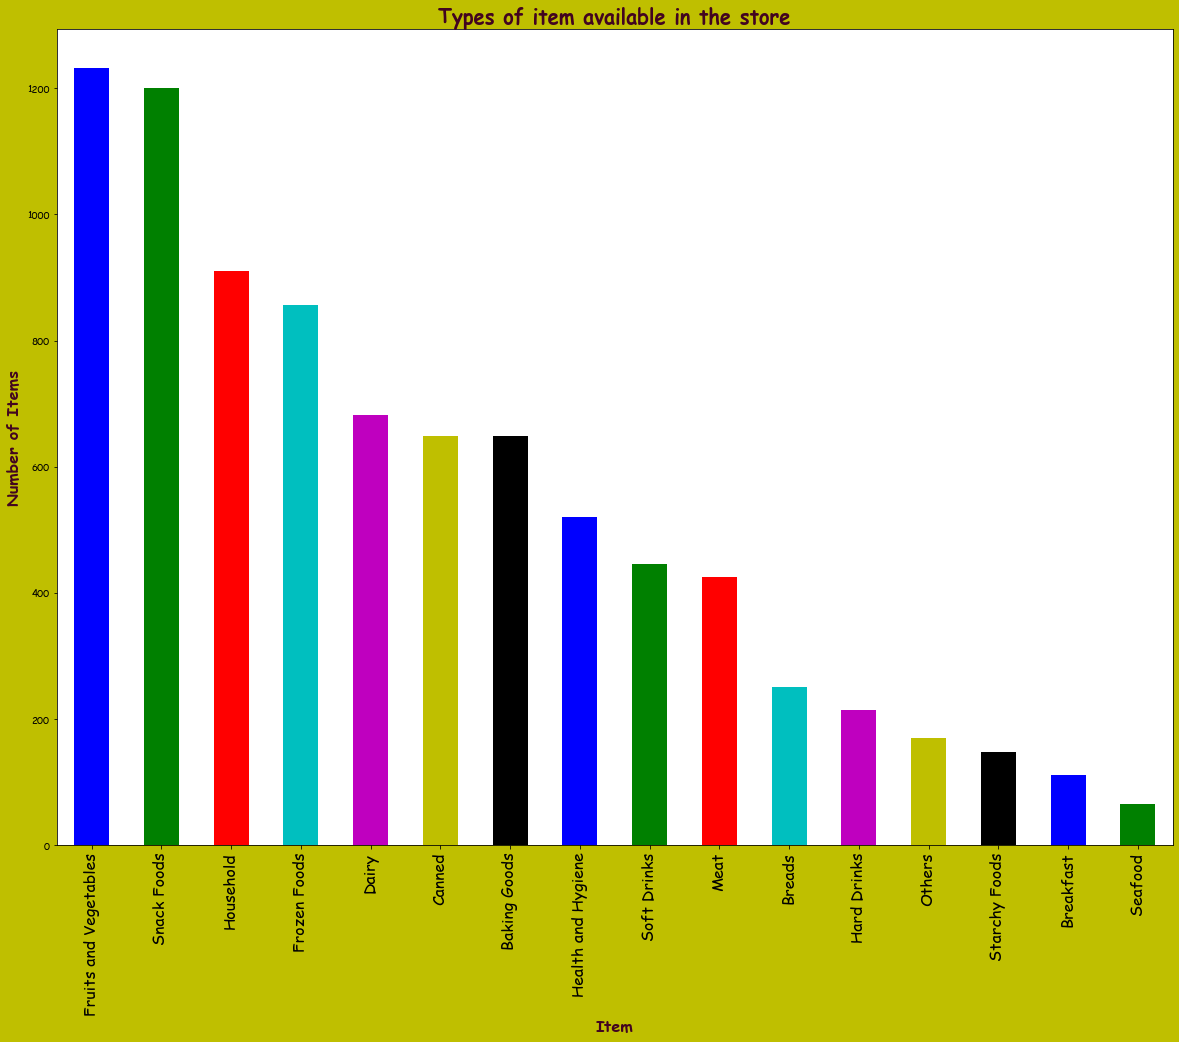

In [24]:
train['Item_Type'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,15),facecolor='y')
train['Item_Type'].value_counts().plot.bar(color = list('bgrcmyk'))
plt.title('Types of item available in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

In [25]:
''' Checking unique items value counts in Outlet_Identifier'''


train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

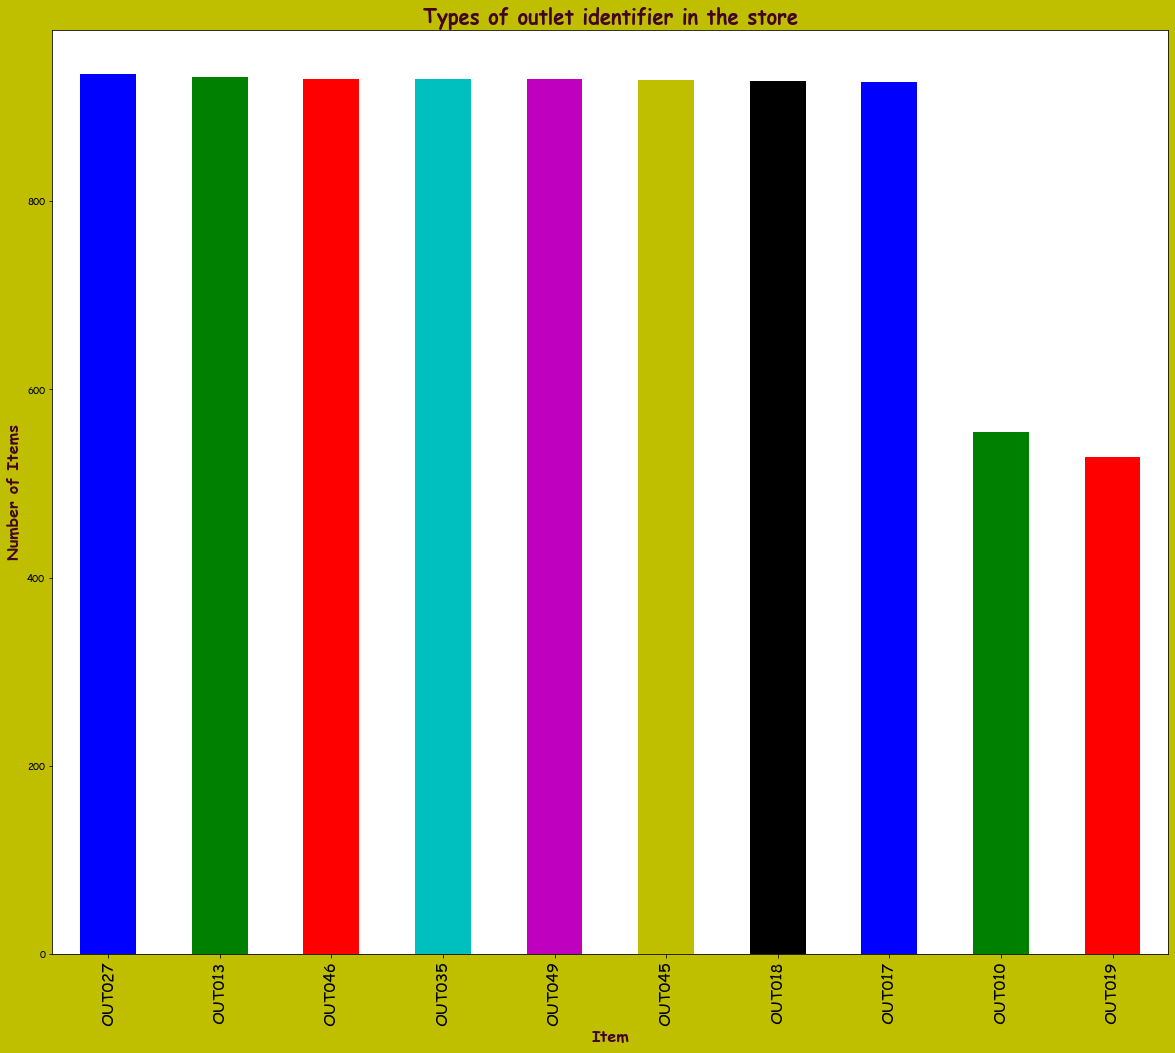

In [26]:
train['Outlet_Identifier'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,17),facecolor='y')
train['Outlet_Identifier'].value_counts().plot.bar(color = list('bgrcmyk'))
plt.title('Types of outlet identifier in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

In [27]:
''' Checking unique items value counts in Outlet_Size'''

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

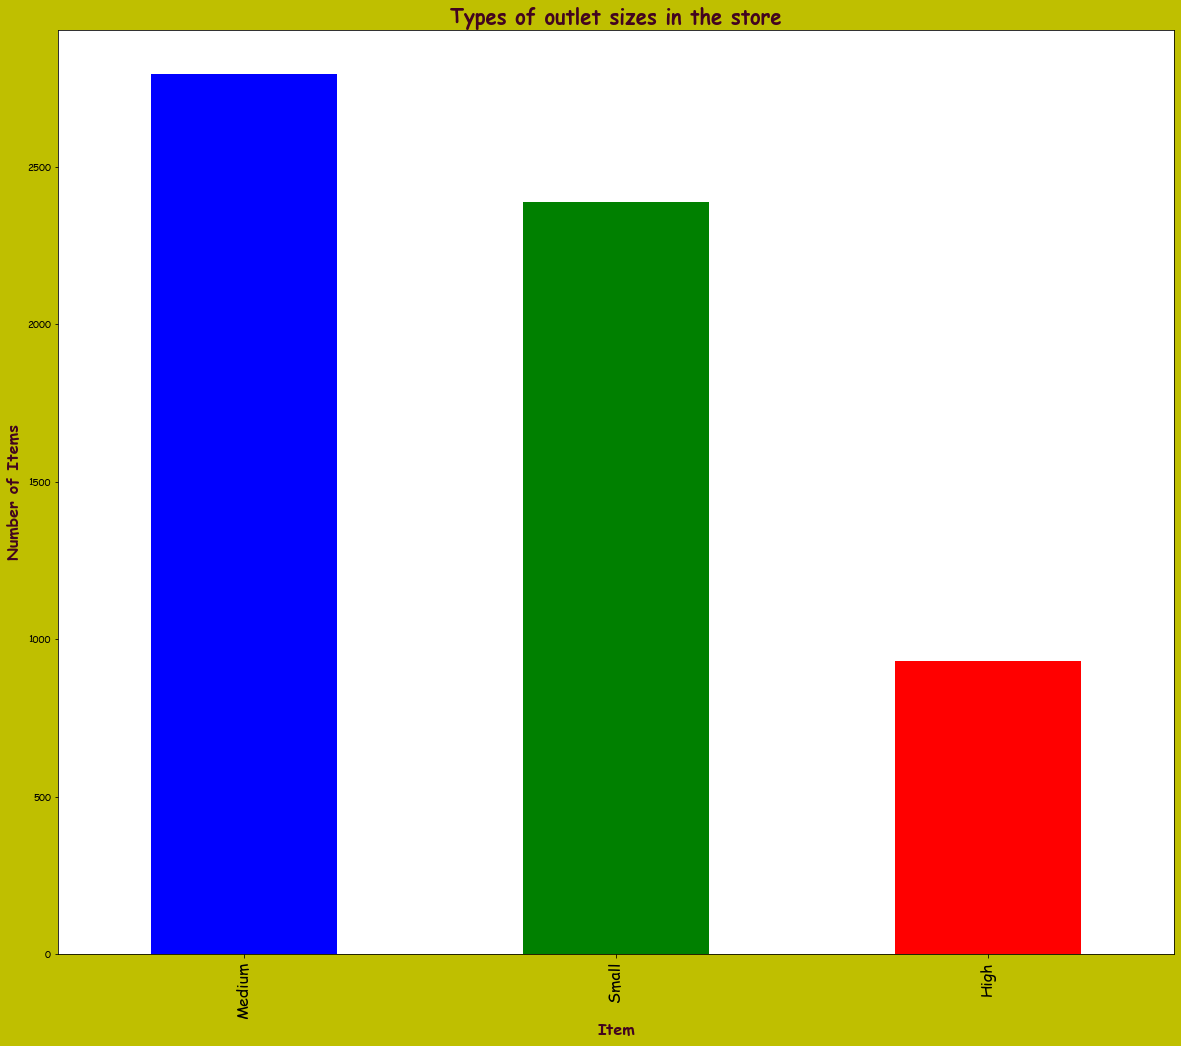

In [28]:
train['Outlet_Size'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,17),facecolor='y')
train['Outlet_Size'].value_counts().plot.bar(color = list('bgrcmyk'))
plt.title('Types of outlet sizes in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

In [29]:
''' Checking unique items value counts in Outlet_Location_Type'''

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

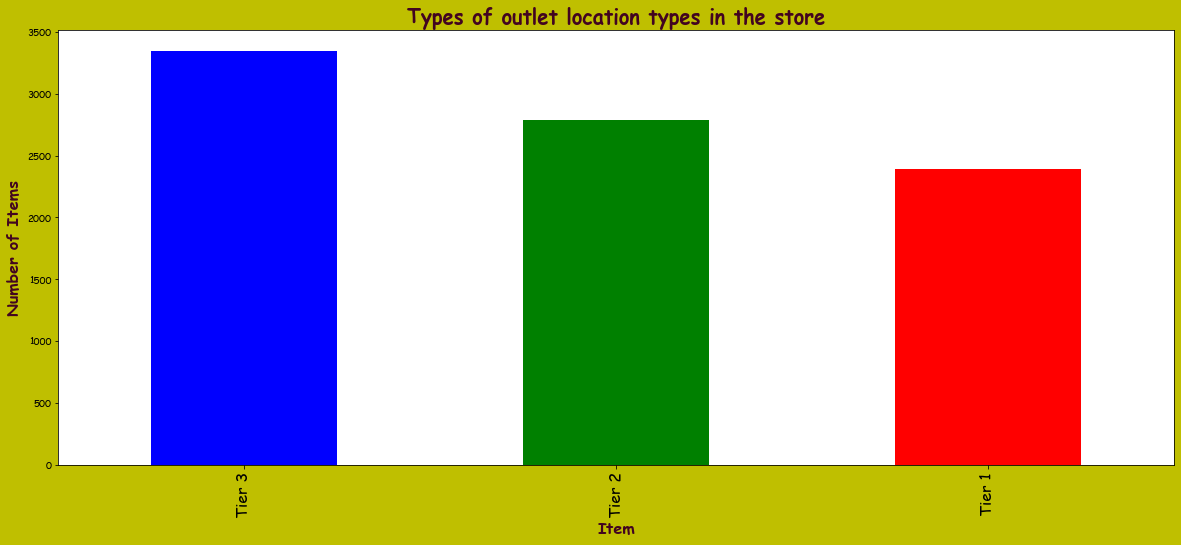

In [30]:
train['Outlet_Location_Type'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,8),facecolor='y')
train['Outlet_Location_Type'].value_counts().plot.bar(color = list('bgrcmyk'))
plt.title('Types of outlet location types in the store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

In [31]:
''' Checking unique items value counts in Outlet_Type'''

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

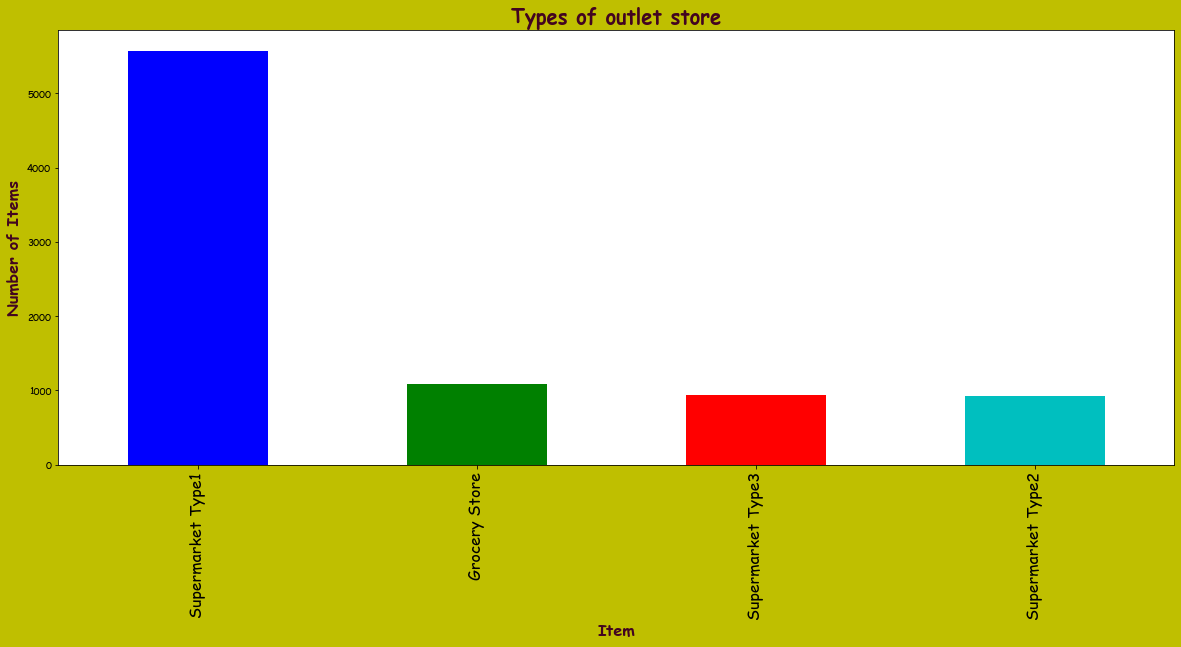

In [32]:
train['Outlet_Type'].value_counts(normalize = True)
plt.rcParams["font.family"] = "fantasy"
plt.figure(figsize=(20,8),facecolor='y')
train['Outlet_Type'].value_counts().plot.bar(color = list('bgrcmyk'))
plt.title('Types of outlet store',fontsize=20,fontweight='bold',color='#420420')
plt.xlabel('Item',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.ylabel('Number of Items',fontsize=16,fontweight='bold',color='#420420')
plt.show()

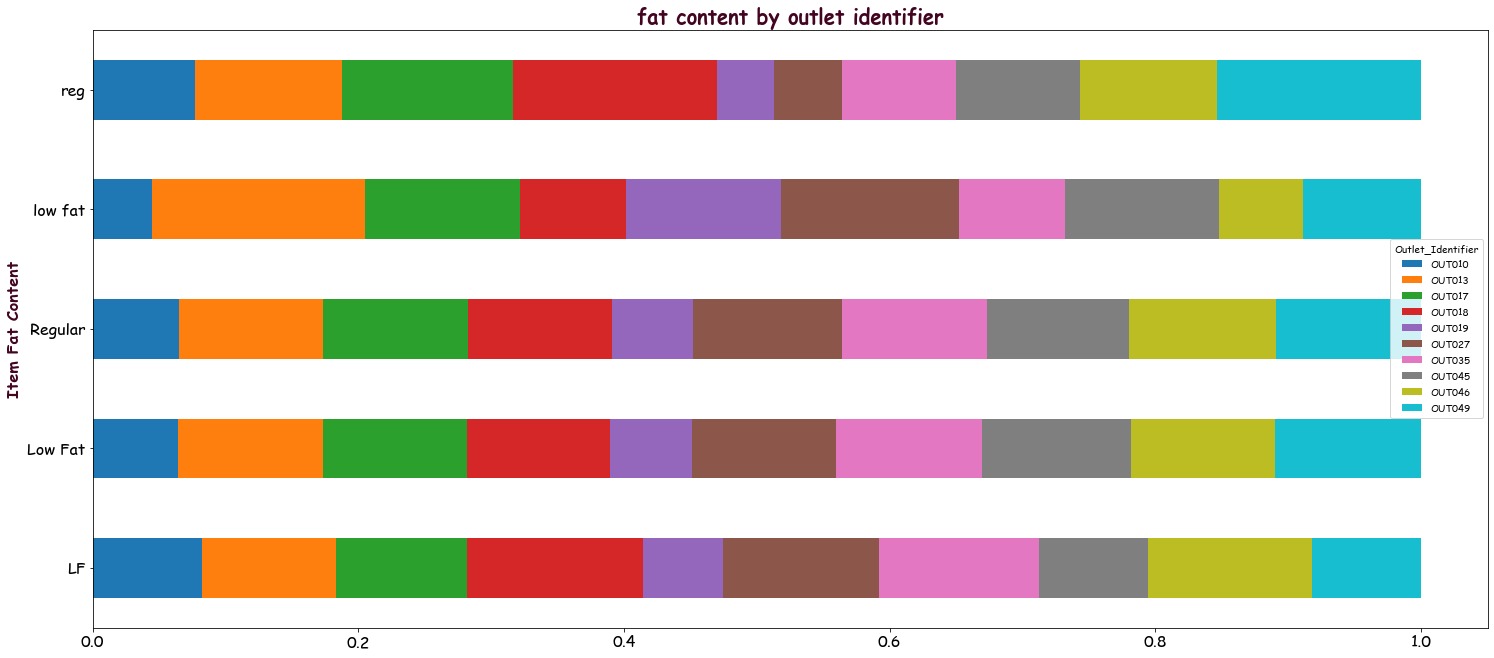

In [33]:
'''  fat content by outlet identifier  '''

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])

Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, figsize=(25, 11))
plt.title('fat content by outlet identifier',fontsize=20,fontweight='bold',color='#420420')
plt.ylabel('Item Fat Content',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

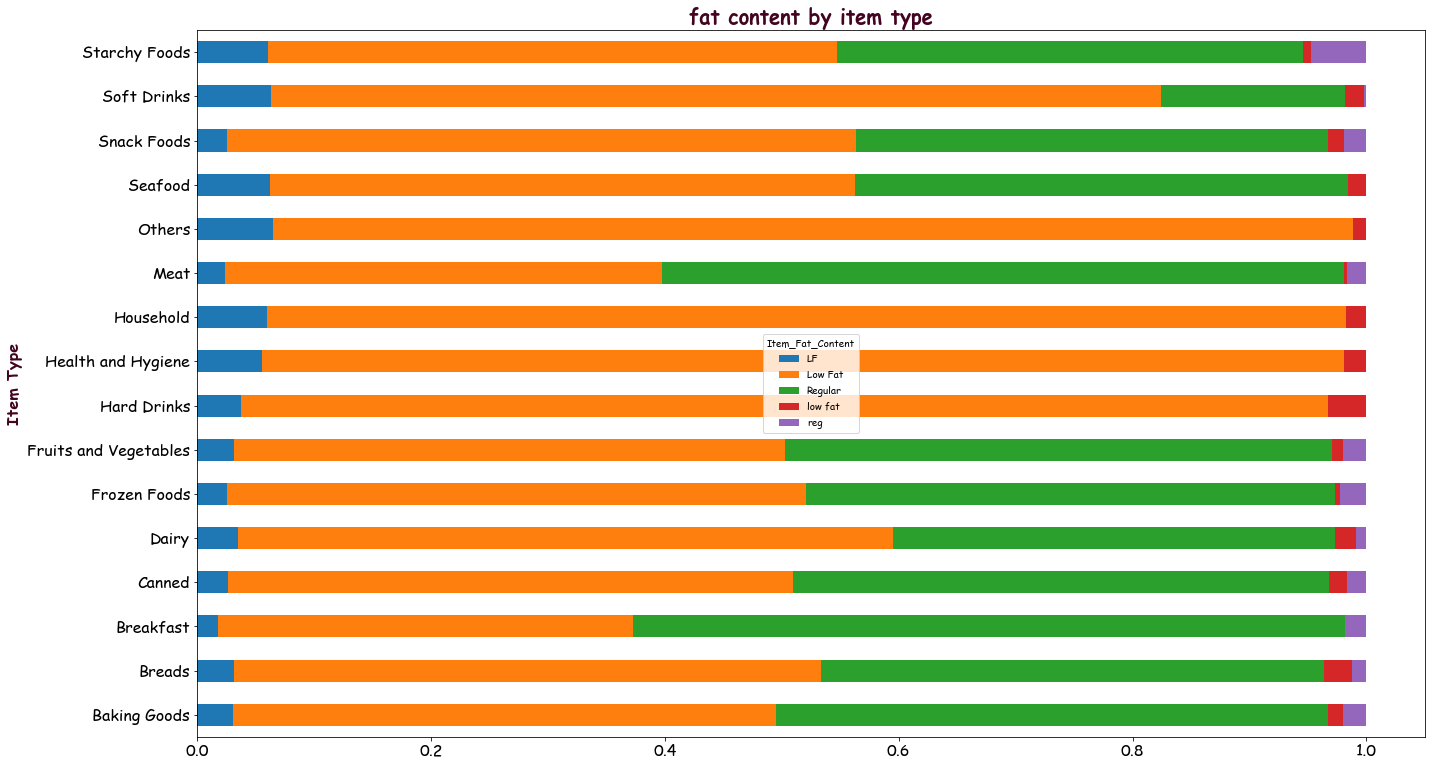

In [34]:
# fat content by item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, figsize=(22, 13))
plt.title('fat content by item type',fontsize=20,fontweight='bold',color='#420420')
plt.ylabel('Item Type',fontsize=16,fontweight='bold',color='#420420')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

### Data Preprocessing

In [35]:
# checking unique values in each columns of dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [36]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [37]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [38]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [39]:
data.sample(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
2389,Food,6.710000,Regular,0.029555,Baking Goods,67.8142,OUT035,2004,Small,Tier 2,Supermarket Type1,2181.288914,test,9
429,Food,7.935000,Low Fat,0.017191,Dairy,51.5350,OUT045,2002,Medium,Tier 2,Supermarket Type1,848.895000,train,11
6239,Food,12.850000,Low Fat,0.099194,Frozen Foods,38.1164,OUT045,2002,Medium,Tier 2,Supermarket Type1,656.478800,train,11
3032,Food,21.100000,Regular,0.020836,Breakfast,129.7994,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914,test,6
978,Food,20.750000,Regular,0.105995,Breakfast,150.5682,OUT010,1998,Medium,Tier 3,Grocery Store,762.341000,train,15
5627,Food,12.792854,Regular,0.115117,Snack Foods,178.6028,OUT027,1985,Medium,Tier 3,Supermarket Type3,2181.288914,test,28
3019,Food,19.200000,Regular,0.084935,Canned,154.9314,OUT035,2004,Small,Tier 2,Supermarket Type1,2181.288914,test,9


In [40]:
'''   Label encoding and One hot encoding    '''

#Label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
    
#One hot encoding
data = pd.get_dummies(data, columns=['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet'])

In [41]:
data.sample(7)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
927,12.792854,0.130933,86.9198,1985,1569.956400,train,28,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
657,13.300000,0.080131,234.0300,2009,4194.540000,train,4,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4701,11.600000,0.038487,55.4272,1987,2181.288914,test,26,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2934,11.350000,0.023303,185.4608,1987,2181.288914,test,26,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4466,5.980000,0.043563,147.9418,1997,2181.288914,test,16,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1555,17.850000,0.046626,152.3682,2004,2181.288914,test,9,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3857,20.250000,0.014245,146.9418,1999,2181.288914,test,14,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item_Weight                     14204 non-null  float64
 1   Item_Visibility                 14204 non-null  float64
 2   Item_MRP                        14204 non-null  float64
 3   Outlet_Establishment_Year       14204 non-null  int64  
 4   Item_Outlet_Sales               14204 non-null  float64
 5   source                          14204 non-null  object 
 6   Outlet_Years                    14204 non-null  int64  
 7   Item_Identifier_Drinks          14204 non-null  uint8  
 8   Item_Identifier_Food            14204 non-null  uint8  
 9   Item_Identifier_Non_Consumable  14204 non-null  uint8  
 10  Outlet_Identifier_OUT010        14204 non-null  uint8  
 11  Outlet_Identifier_OUT013        14204 non-null  uint8  
 12  Outlet_Identifier_OUT017        1

In [43]:
# splitting the data into dependent and independent variables

x = data.drop(['Item_Outlet_Sales','source'], axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 56)
(14204,)


In [44]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 58)
(5681, 58)


In [45]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 56)
(9942,)
(4262, 56)
(4262,)


### Modelling

#### Linerar Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[2817.   2281.5  2456.25 ... 1824.25 2531.75 1597.5 ]
RMSE : 1081.5029656665286
Variance score: 0.35


#### AdaBoost Regressor

In [47]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1180.1308134063731


#### XgBoost Regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[2847.38139166 2400.73275797 2431.40347592 ... 1778.56762966 2597.76278714
  743.86135585]
RMSE : 1068.9255708039102


#### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

[2836.31623052 1819.94997472 2608.79981148 ... 1787.46074002 2121.45983419
 1181.66391716]
RMSE : 1136.0369190057438
Variance score: 0.29
Result : 0.8992048643334953


#### Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))



[2181.28891358 1187.7872     2181.28891358 ...  722.393      2181.28891358
  195.7452    ]
 RMSE :  1597.492294572187


#### Support vector machine

In [51]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1344.4437448834944
